# **Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from __init__ import *


# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.width", 500)

# **Datasets**

In [3]:
data = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
sample = pd.read_csv("Data/sample_submission.csv")

In [4]:
data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.00,3,0.00,2,1.00,0.00,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.00,1,0.00,2,1.00,1.00,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.00,10,0.00,2,1.00,0.00,184866.69,0
3,3,15741417,Kao,581,France,Male,34.00,2,148882.54,1,1.00,1.00,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.00,5,0.00,2,1.00,1.00,15068.83,0


In [5]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.00,2,0.00,2,0.00,1.00,160976.75
1,165035,15782418,Nott,683,France,Female,46.00,2,0.00,1,1.00,0.00,72549.27
2,165036,15807120,K?,656,France,Female,34.00,7,0.00,2,1.00,0.00,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.00,8,0.00,1,1.00,0.00,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.00,10,121263.62,1,1.00,0.00,139431.00


In [6]:
data.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [7]:
data_summary(data)

############## SHAPE ##############
165034
############## TYPES ##############
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object
############## NULL ##############
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
############ DESCRIBE ############
                    count        mean      std         min          0%         25%         50%         75%         90%         95%         99%         max
CustomerId      165034.00 15692005.02 71397.8

In [8]:
data_summary(test)

############## SHAPE ##############
110023
############## TYPES ##############
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object
############## NULL ##############
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
############ DESCRIBE ############
                    count        mean      std         min          0%         25%         50%         75%         90%         95%         99%         max
CustomerId      110023.00 15692096.61 71684.99 15565701.00 15565701.00 15632859.00 15690175.0

## *EDA*

In [9]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.00,3,0.00,2,1.00,0.00,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.00,1,0.00,2,1.00,1.00,49503.50,0
2,15694510,Hsueh,678,France,Male,40.00,10,0.00,2,1.00,0.00,184866.69,0
3,15741417,Kao,581,France,Male,34.00,2,148882.54,1,1.00,1.00,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.00,5,0.00,2,1.00,1.00,15068.83,0


In [10]:
pd.DataFrame({
    "Customer_count" : data.groupby(["Geography", "Gender"])["CustomerId"].count(),
    "Exited_count": data.groupby(["Geography", "Gender"])["Exited"].sum(),
    "Target_ratio": (data.groupby(["Geography", "Gender"])["Exited"].sum() / data.groupby("Geography")["CustomerId"].count()) *100,
    "Total_ratio": (data.groupby(["Geography", "Gender"])["Exited"].sum() / data["Exited"].shape[0]) *100,
    "Salary_mean": data.groupby(["Geography", "Gender"])["EstimatedSalary"].mean()
})

Customer_count  Exited_count  Target_ratio  Total_ratio  Salary_mean
Geography Gender                                                                      
France    Female           39976          9002          9.55         5.45    112752.81
          Male             54239          6570          6.97         3.98    112285.74
Germany   Female           16388          7596         21.95         4.60    114748.88
          Male             18218          5518         15.95         3.34    113085.45
Spain     Female           15520          3507          9.68         2.13    111883.21
          Male             20693          2728          7.53         1.65    111336.08

In [11]:
print(f"Count of Surname: {data['Surname'].nunique()}")
print(f"Count of Customer Id: {data['CustomerId'].nunique()}")

Count of Surname: 2797
Count of Customer Id: 23221


In [12]:
data.loc[data["CustomerId"] == 15660878]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1329,15660878,T'ien,743,France,Male,76.00,9,126076.24,1,1.00,1.00,34436.83,0
11256,15660878,Ndubueze,714,Spain,Male,25.00,1,0.00,2,1.00,1.00,103381.77,0
43508,15660878,T'ien,752,France,Male,92.00,1,126076.24,2,1.00,1.00,34436.83,0
49584,15660878,Flannery,638,France,Male,39.00,3,0.00,2,0.00,1.00,105080.53,0
74699,15660878,T'ien,696,France,Male,92.00,9,0.00,1,0.00,1.00,163563.07,1
86176,15660878,T'ien,545,Germany,Female,38.00,3,114754.08,1,1.00,0.00,136050.44,0
94261,15660878,T'ien,705,France,Male,42.00,1,126076.24,2,1.00,1.00,34436.83,0
121560,15660878,T'ien,775,Spain,Male,92.00,1,126076.24,2,1.00,1.00,34436.83,0
139905,15660878,Brown,610,France,Female,47.00,1,0.00,2,0.00,1.00,80178.54,0


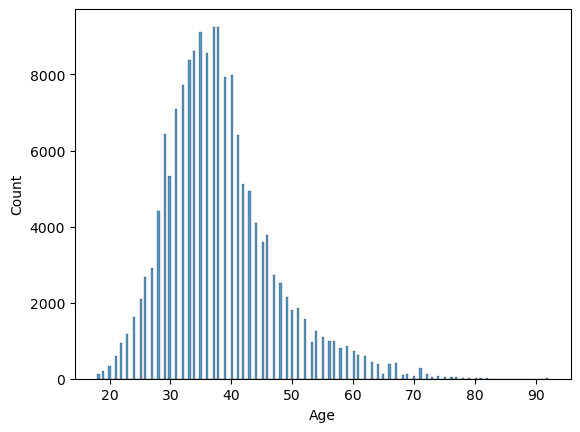

In [13]:
sns.histplot(data=data, x = "Age")
plt.show()

In [14]:

data["Status"] = pd.cut(data["Age"],
                          bins = [data["Age"].min(), 22, 55, data["Age"].max()],
                          labels= ["Student","Employee","Retired"])

In [15]:
test["Status"] = pd.cut(test["Age"],
                          bins = [test["Age"].min(), 22, 55, test["Age"].max()],
                          labels= ["Student","Employee","Retired"])

<Axes: xlabel='Status', ylabel='EstimatedSalary'>

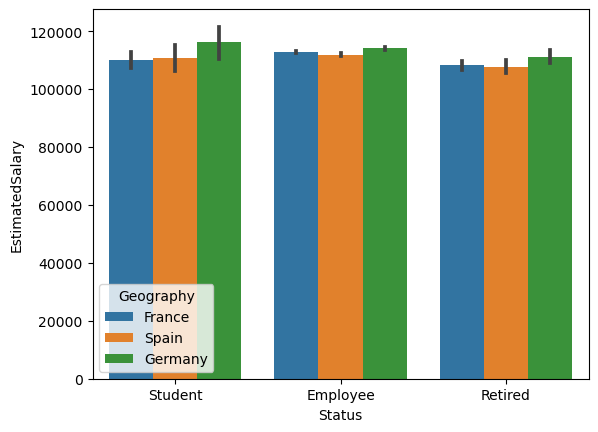

In [16]:
sns.barplot(x = "Status", 
            y = "EstimatedSalary", 
            hue = "Geography" ,
            data = data)

<Axes: xlabel='Status', ylabel='Balance'>

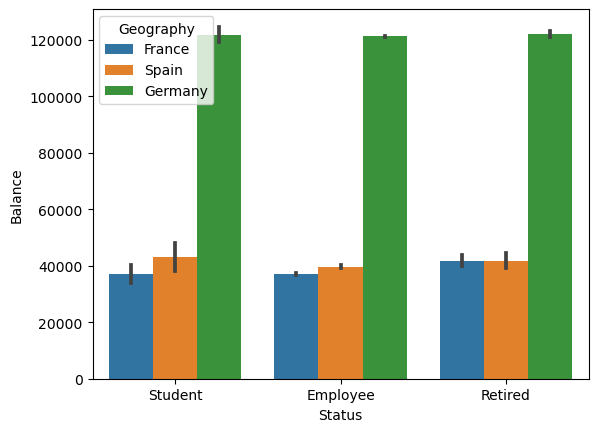

In [17]:
sns.barplot(x = "Status", 
            y = "Balance", 
            hue = "Geography" ,
            data = data)

In [18]:
data.groupby("Status")["EstimatedSalary"].mean()

Status
Student    111169.84
Employee   112809.91
Retired    108827.28
Name: EstimatedSalary, dtype: float64

In [19]:
data.groupby("Status")["Balance"].mean()

Status
Student    51610.92
Employee   55154.18
Retired    62303.80
Name: Balance, dtype: float64

In [20]:
data["Empty_Balance"] = np.where(data["Balance"] == 0.00, 0, 1)   
test["Empty_Balance"] = np.where(test["Balance"] == 0.00, 0, 1)   

<Axes: xlabel='Exited', ylabel='Empty_Balance'>

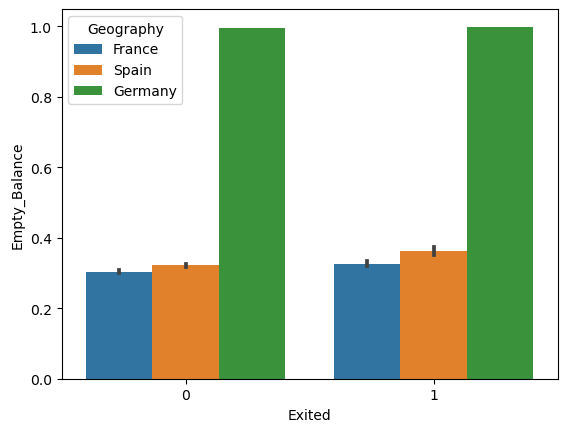

In [21]:
sns.barplot(x = "Exited", 
            y = "Empty_Balance", 
            hue = "Geography" ,
            data = data)

In [22]:
# Label Encoder

lab = LabelEncoder()
data["Gender"] = lab.fit_transform(data["Gender"])
print(lab.inverse_transform([0,1]))

test["Gender"] = lab.fit_transform(test["Gender"])
print(lab.inverse_transform([0,1]))

data["Geography"] = lab.fit_transform(data["Geography"])
print(lab.inverse_transform([0,1,2]))

test["Geography"] = lab.fit_transform(test["Geography"])
print(lab.inverse_transform([0,1,2]))

data["Status"] = lab.fit_transform(data["Status"])
print(lab.inverse_transform([0,1,2]))

test["Status"] = lab.fit_transform(test["Status"])
print(lab.inverse_transform([0,1,2]))

['Female' 'Male']
['Female' 'Male']
['France' 'Germany' 'Spain']
['France' 'Germany' 'Spain']
['Employee' 'Retired' 'Student']
['Employee' 'Retired' 'Student']


C:\Users\BETÜL DEMİRDAĞ\AppData\Local\Temp\ipykernel_23032\232394746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()[['Exited']]


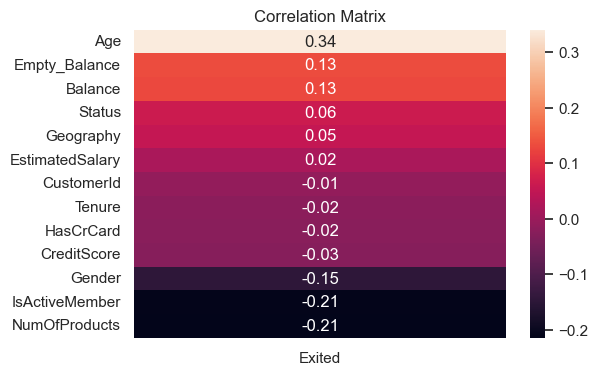

In [23]:
corr_matrix = data.corr()[['Exited']]
sns.set(rc={'figure.figsize': (6, 4)})
corr_matrix.drop(['Exited'], axis=0, inplace=True)
sns.heatmap(corr_matrix.sort_values(by='Exited', ascending=False), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [24]:
data.drop(["CustomerId", "Surname"], axis = 1, inplace=True)
test.drop(["CustomerId", "Surname"], axis = 1, inplace=True)

In [25]:
# One Hot Encoder
one_hot_columns = ["Empty_Balance", "Status", "Geography", "Gender", "HasCrCard", "IsActiveMember"]
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)
test = pd.get_dummies(test, columns=one_hot_columns, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Empty_Balance_1,Status_1,Status_2,Status_3,Geography_1,Geography_2,Gender_1,HasCrCard_1.0,IsActiveMember_1.0
0,668,33.00,3,0.00,2,181449.97,0,0,0,0,0,0,0,1,1,0
1,627,33.00,1,0.00,2,49503.50,0,0,0,0,0,0,0,1,1,1
2,678,40.00,10,0.00,2,184866.69,0,0,0,0,0,0,0,1,1,0
3,581,34.00,2,148882.54,1,84560.88,0,1,0,0,0,0,0,1,1,1
4,716,33.00,5,0.00,2,15068.83,0,0,0,0,0,0,1,1,1,1


In [26]:
y = data["Exited"]
x = data.drop("Exited", axis = 1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.20, random_state= 42)

In [30]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machines' : LinearSVC(),
    'Decision Trees' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbor' : KNeighborsClassifier()
}

In [31]:
evaluation(models, x_train, x_test, y_train, y_test)

c:\Program Files\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Program Files\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.79,0.49,0.13,0.20
Support Vector Machines,0.26,0.21,0.94,0.35
Decision Trees,0.80,0.51,0.54,0.53
Random Forest,0.86,0.72,0.54,0.62
Naive Bayes,0.79,0.53,0.19,0.28
K-Nearest Neighbor,0.76,0.31,0.11,0.17
